<a href="https://colab.research.google.com/github/PGV1000/data_mining/blob/main/%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%9F%D0%A0_%E2%84%966_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_K_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №6. Метод K-ближайших соседей

# Базовый алгоритм KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [ ]:
data = load_iris()
x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=20)
x_train.shape, x_test.shape

((130, 4), (20, 4))

#### 1.2. Обучите модель KNN

In [ ]:
n_neighbors = 3
model = KNeighborsClassifier(n_neighbors=n_neighbors)

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 1.3. Проверьте качество работы модели

In [ ]:
pred_test = model.predict(x_test)
pred_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
display(pred_test, y_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0])

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0])

#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

In [ ]:
def train_and_validate_model(n_neighbors):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_pred, y_test)
  return accuracy

In [ ]:
accuracy = []
max_neighbours = 20
for i in range(1, max_neighbours+1):
  accuracy.append(train_and_validate_model(i))
accuracy = pd.DataFrame(accuracy)
accuracy.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


([<matplotlib.axis.XTick at 0x795a782c91e0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

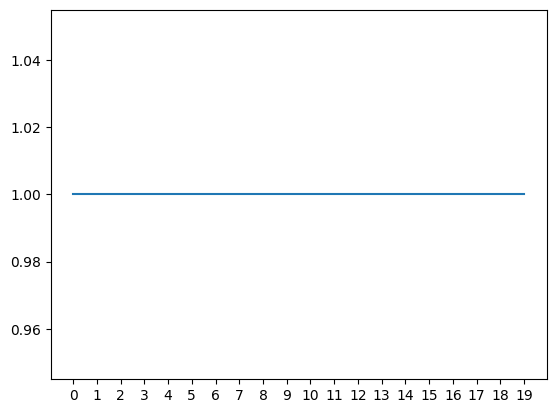

In [ ]:
plt.plot(accuracy)
plt.xticks(np.arange(0,20,1))

### 2. KNN рукописный

#### 2.1. Возьмите два случайных тестовых объектов

In [ ]:
random_indexes = np.random.randint(0,20,size=2)
test_objects = x_test.iloc[random_indexes]

#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
distances = pd.DataFrame(pairwise_distances(x_train, test_objects, metric='euclidean'))
distances.keys()

RangeIndex(start=0, stop=2, step=1)

#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
k = 3
nearest_neighbors_1_idxs = distances[0].sort_values().head(k).index
nearest_neighbors_2_idxs = distances[1].sort_values().head(k).index

In [ ]:
nearest_neighbors_2_idxs

Index([119, 68, 17], dtype='int64')

In [ ]:
x_train.iloc[nearest_neighbors_1_idxs]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
139,6.9,3.1,5.4,2.1
112,6.8,3.0,5.5,2.1


#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
# Создаем цветовую палитру для двух классов
cmap_bold = ["darkorange", "darkblue"]

# Создаем новую фигуру размером 10x8
plt.figure(figsize=(10, 8))

# Визуализируем все точки обучающего набора
sns.scatterplot(
    x=x_train['sepal length (cm)'], # Первый признак для оси X
    y=x_train['petal width (cm)'], # Второй признак для оси Y
    hue=y_train,      # Цвет точек зависит от их класса
    palette=cmap_bold # Используем созданную цветовую палитру
)

# Добавляем на график k ближайших соседей
plt.scatter(x_train.iloc[nearest_neighbors_1_idxs, 0], x_train.iloc[nearest_neighbors_1_idxs, 3],
            c='g',            # Зеленый цвет для ближайших соседей
            alpha=0.3,        # Устанавливаем прозрачность
            marker='o',       # Используем круглые маркеры
            s=100,            # Размер маркеров
            label='nearest neighbors')  # Метка для легенды

# Добавляем на график k ближайших соседей
plt.scatter(x_train.iloc[nearest_neighbors_2_idxs, 0], x_train.iloc[nearest_neighbors_2_idxs, 3],
            c='g',            # Зеленый цвет для ближайших соседей
            alpha=0.3,        # Устанавливаем прозрачность
            marker='o',       # Используем круглые маркеры
            s=100,            # Размер маркеров
            label='nearest neighbors')  # Метка для легенды

# Добавляем тестовую точку на график
plt.scatter(test_objects['sepal length (cm)'], test_objects['petal width (cm)'],
            c='g',            # Зеленый цвет для тестовой точки
            marker='*',       # Используем звездочку для обозначения тестовой точки
            s=100,            # Размер маркера
            label='test dot') # Метка для легенды

# Добавляем легенду на график
plt.legend()

KeyError: 'sepal length (cm)'

<Figure size 1000x800 with 0 Axes>

#### 2.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
real_objects = y_test[random_indexes]
real_objects

array([2, 0])

## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = fetch_california_housing()
x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size = 100)
print(x_train.shape, x_test.shape)

(20540, 8) (100, 8)


Затем нормализуйте данные:

In [ ]:
mms = MinMaxScaler()
mms.fit(x_train)
x_train = pd.DataFrame(mms.transform(x_train[x_train.columns]), columns=x_train.columns)
x_test = pd.DataFrame(mms.transform(x_test[x_train.columns]), columns=x_train.columns)

#### 3.2. Обучите модель KNN


In [ ]:
n_neighbors = 3
model = KNeighborsRegressor(n_neighbors=n_neighbors)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

#### 3.3. Проверьте качество работы модели

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([3.73066667, 0.61133333, 2.57233333, 1.00866667, 2.48133333,
       3.39233333, 2.62833333, 1.514     , 1.63633333, 3.01366667,
       3.38166667, 1.647     , 0.85133333, 3.156     , 0.88566667,
       1.18833333, 3.891     , 1.57366667, 1.60566667, 3.62367   ,
       0.64866667, 1.53133333, 0.573     , 1.882     , 2.88233333,
       0.89866667, 0.989     , 1.87433333, 4.102     , 2.38133667,
       0.68833333, 1.194     , 2.74866667, 0.71466667, 4.52234   ,
       1.99333333, 0.97366667, 2.284     , 2.533     , 1.07533333,
       0.76433333, 1.942     , 2.22333333, 2.31733333, 0.805     ,
       1.66666667, 2.98733333, 2.56566667, 1.655     , 0.48366667,
       2.91766667, 1.82666667, 0.74233333, 1.67066667, 2.291     ,
       1.51166667, 2.262     , 1.88866667, 3.10733333, 1.717     ,
       1.95733333, 2.37466667, 1.12033333, 2.48366667, 1.33333333,
       1.91033333, 1.93966667, 1.10333333, 4.45166667, 0.768     ,
       0.93433333, 2.32066667, 0.894     , 2.004     , 3.49133

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse: {mse} \n r2: {r2}')

mse: 0.41061609293422224 
 r2: 0.5935641409666017


#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

In [ ]:
def train_and_validate_regression_model(n_neighbors):
  model = KNeighborsRegressor(n_neighbors=n_neighbors)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return mse, r2

In [ ]:
mse = []
r2 = []
max_neighbours = 100
for i in range(1, max_neighbours+1):
  mse_i, r2_i = train_and_validate_regression_model(i)
  mse.append(mse_i)
  r2.append(r2_i)
mse = pd.DataFrame(mse, columns=['mse'])
r2 = pd.DataFrame(r2, columns=['r2'])
accuracy_scores = pd.concat([mse, r2], axis=1)
accuracy_scores['weighted_sum'] = -0.5*accuracy_scores['mse'] + 0.5*accuracy_scores['r2']

Text(0.5, 0, 'neighbours')

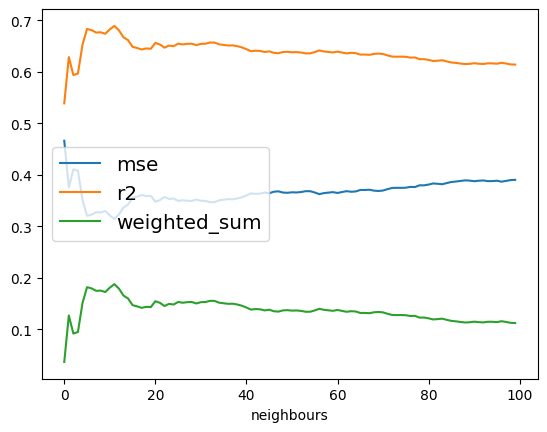

In [ ]:
plt.plot(accuracy_scores)
plt.legend(["mse", "r2", "weighted_sum"], fontsize="x-large")
plt.xlabel('neighbours')

In [ ]:
best_n_neighbours = accuracy_scores.sort_values(by='weighted_sum', ascending=False).head(1).index
print(f'Лучшее значение k: {best_n_neighbours[0]}')

Лучшее значение k: 11


### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [ ]:
random_indexes = np.random.randint(0,20,size=2)
test_objects = x_test.iloc[random_indexes]

#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
distances = pd.DataFrame(pairwise_distances(x_train, test_objects, metric='euclidean'))
distances.keys()

RangeIndex(start=0, stop=2, step=1)

#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
k = 11
nearest_neighbors_1_idxs = distances[0].sort_values().head(k).index
nearest_neighbors_2_idxs = distances[1].sort_values().head(k).index

In [ ]:
nearest_neighbors_2_idxs

Index([17122, 17057, 5352, 16077, 5233, 16505, 15871, 5603, 12965, 11662,
       7590],
      dtype='int64')

In [ ]:
x_train.iloc[nearest_neighbors_1_idxs]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12133,0.135584,0.313725,0.063104,0.050283,0.026766,0.001195,0.127524,0.790837
16514,0.146557,0.333333,0.033844,0.026227,0.035791,0.001379,0.149841,0.778884
7200,0.120695,0.372549,0.040080,0.033143,0.036464,0.000861,0.122210,0.781873
13967,0.141308,0.333333,0.078374,0.054255,0.011435,0.000988,0.131775,0.778884
17111,0.081723,0.313725,0.056643,0.052772,0.033577,0.001056,0.147715,0.787849
11643,0.097709,0.294118,0.038512,0.042927,0.047199,0.001780,0.141339,0.777888
8838,0.129315,0.313725,0.024046,0.016940,0.002130,0.002470,0.122210,0.813745
7220,0.116074,0.294118,0.038667,0.031530,0.037641,0.001273,0.100956,0.771912
10465,0.118681,0.274510,0.046198,0.033941,0.025141,0.000812,0.121148,0.789841
2450,0.157163,0.333333,0.043912,0.037389,0.004793,0.001335,0.138151,0.746016


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
y_pred1 = pd.DataFrame(y_train).iloc[nearest_neighbors_1_idxs].mean()
y_pred2 = pd.DataFrame(y_train).iloc[nearest_neighbors_2_idxs].mean()
preds = pd.concat([y_pred1, y_pred2], axis=1, keys=['y_pred1', 'y_pred2'])
preds

,y_pred1,y_pred2
0,1.303909,3.335274


#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
real_objects = y_test[random_indexes]
real_objects

array([0.975, 2.286])

Предсказания отклоняются от истины, но не так сильно, они довольно близки.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
data = load_iris()

x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [ ]:
sepal_length = x['sepal length (cm)']
petal_width = x['petal width (cm)']

### Визуализируйте ваши данные на графике

<ipython-input-150-19b30666fd66>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

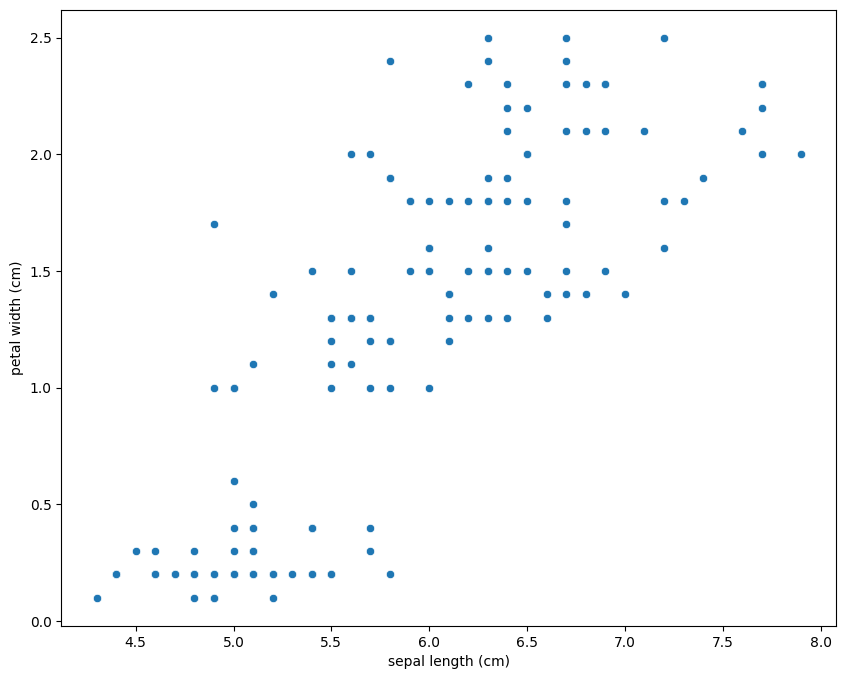

In [ ]:
# Создаем цветовую палитру для двух классов
cmap_bold = ["darkorange", "darkblue"]

# Создаем новую фигуру размером 10x8
plt.figure(figsize=(10, 8))

# Визуализируем все точки обучающего набора
sns.scatterplot(
    x=sepal_length, # Первый признак для оси X
    y=petal_width, # Второй признак для оси Y
    palette=cmap_bold # Используем созданную цветовую палитру
)

### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=20)
x_train.shape, x_test.shape

((130, 4), (20, 4))

#### 1.2. Обучите модель KNN на 50 соседях

In [ ]:
n_neighbors = 50
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### 1.3. Проверьте качество работы модели

In [ ]:
y_pred = model.predict(x_test)
display(y_pred, y_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0])

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0])

#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
random_index = np.random.randint(0,20,size=1)
test_objects = x_test.iloc[random_index]
distances = pd.DataFrame(pairwise_distances(x_train, test_objects, metric='euclidean'))
distances.describe()

,0
count,130.000000
mean,3.662752
std,1.817256
min,0.412311
25%,2.117617
50%,3.136036
75%,5.843800
max,6.730527


#### 1.5. Выберите топ  k  соседей


In [ ]:
nearest_neighbors_idxs = distances[0].sort_values().head(n_neighbors).index
nearest_neighbors_idxs

Index([ 32,  74,  11,  78,   4,  38,  34,  72, 123,  25,  91,  63,  51,  33,
        20, 128,  45,  58,  56,  89,  19, 126,  75,  13, 101,  35,  84,  48,
        98,  23,   2,  77, 117,  66, 114,  86, 125, 121,  42,  47,   9,  24,
        49,  67,  18,  36,  65, 127,  52,  94],
      dtype='int64')

#### 1.6. Выведите финальное предсказание для этого объекта

In [ ]:
y_pred = pd.DataFrame(y_train).iloc[nearest_neighbors_idxs].mode()
y_pred

,0
0,2


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
y_real = y_test[random_index]
y_real

array([2])

In [ ]:
y_pred_sklearn = model.predict(test_objects)
y_pred_sklearn

array([2])

#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

<ipython-input-164-663eb7ac7eff>:8: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


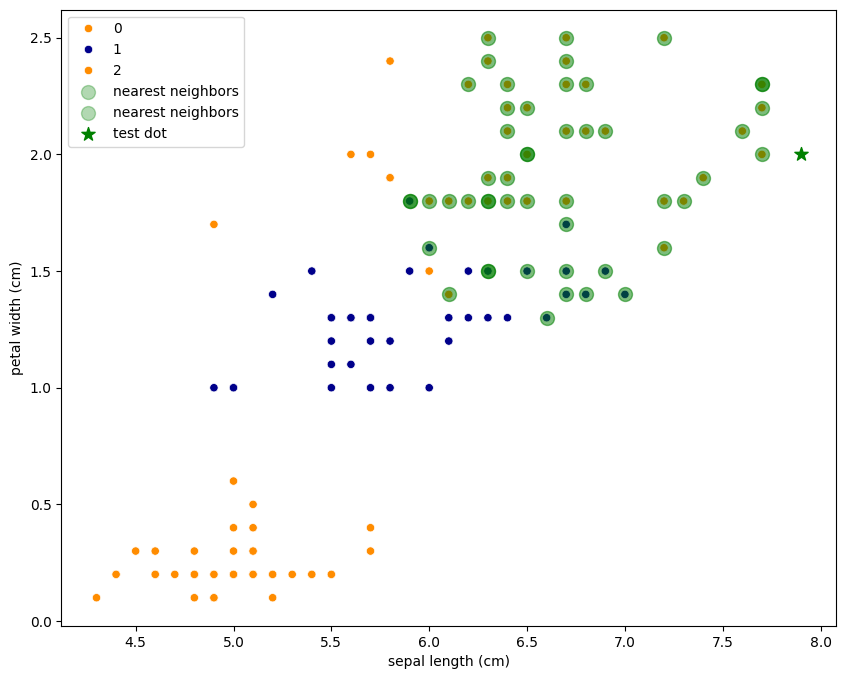

In [ ]:
# Создаем цветовую палитру для двух классов
cmap_bold = ["darkorange", "darkblue"]

# Создаем новую фигуру размером 10x8
plt.figure(figsize=(10, 8))

# Визуализируем все точки обучающего набора
sns.scatterplot(
    x=x_train['sepal length (cm)'], # Первый признак для оси X
    y=x_train['petal width (cm)'], # Второй признак для оси Y
    hue=y_train,      # Цвет точек зависит от их класса
    palette=cmap_bold # Используем созданную цветовую палитру
)

# Добавляем на график k ближайших соседей
plt.scatter(x_train.iloc[nearest_neighbors_idxs, 0], x_train.iloc[nearest_neighbors_idxs, 3],
            c='g',            # Зеленый цвет для ближайших соседей
            alpha=0.3,        # Устанавливаем прозрачность
            marker='o',       # Используем круглые маркеры
            s=100,            # Размер маркеров
            label='nearest neighbors')  # Метка для легенды

# Добавляем на график k ближайших соседей
plt.scatter(x_train.iloc[nearest_neighbors_idxs, 0], x_train.iloc[nearest_neighbors_idxs, 3],
            c='g',            # Зеленый цвет для ближайших соседей
            alpha=0.3,        # Устанавливаем прозрачность
            marker='o',       # Используем круглые маркеры
            s=100,            # Размер маркеров
            label='nearest neighbors')  # Метка для легенды

# Добавляем тестовую точку на график
plt.scatter(test_objects['sepal length (cm)'], test_objects['petal width (cm)'],
            c='g',            # Зеленый цвет для тестовой точки
            marker='*',       # Используем звездочку для обозначения тестовой точки
            s=100,            # Размер маркера
            label='test dot') # Метка для легенды

# Добавляем легенду на график
plt.legend()

### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [ ]:
weighted_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights = 'distance')
weighted_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 2.2. Проверьте качество работы модели


In [ ]:
y_pred_weighted = weighted_model.predict(x_test)
display(y_pred_weighted, y_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0])

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0])

#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
distances.describe()

,0
count,130.000000
mean,3.662752
std,1.817256
min,0.412311
25%,2.117617
50%,3.136036
75%,5.843800
max,6.730527


#### 2.4. Выберите топ  k  соседей


In [ ]:
nearest_neighbors_idxs

Index([ 32,  74,  11,  78,   4,  38,  34,  72, 123,  25,  91,  63,  51,  33,
        20, 128,  45,  58,  56,  89,  19, 126,  75,  13, 101,  35,  84,  48,
        98,  23,   2,  77, 117,  66, 114,  86, 125, 121,  42,  47,   9,  24,
        49,  67,  18,  36,  65, 127,  52,  94],
      dtype='int64')

#### 2.5. Рассчитайте вес для каждого соседа

In [ ]:
neighbors_weights = 1/distances.iloc[nearest_neighbors_idxs]
neighbors_weights

,0
32,2.425356
74,1.132277
11,1.078328
78,1.072113
4,0.975900
38,0.940721
34,0.905357
72,0.860663
123,0.778499
25,0.741249


#### 2.6. Выведите финальное предсказание для этого объекта

In [ ]:
neighbor_classes = pd.DataFrame(y_train).iloc[nearest_neighbors_idxs]
neighbor_classes['weights'] = neighbors_weights
classes_weights_sum = neighbor_classes.groupby(0)['weights'].sum()
classes_weights_sum

,weights
0,
1,4.698240
2,25.783941


In [ ]:
final_pred = classes_weights_sum.sort_values(ascending=False).head(1).index
print(f'Предсказание: {final_pred[0]}')

Предсказание: 2


#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
y_real[0], y_pred_sklearn[0]

(2, 2)

#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

In [ ]:
neighbors_weights_normalized = neighbors_weights/neighbors_weights.max()
neighbors_weights_normalized

,0
32,1.000000
74,0.466850
11,0.444606
78,0.442043
4,0.402374
38,0.387869
34,0.373288
72,0.354860
123,0.320983
25,0.305625


<ipython-input-203-e77e5d6f2493>:8: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


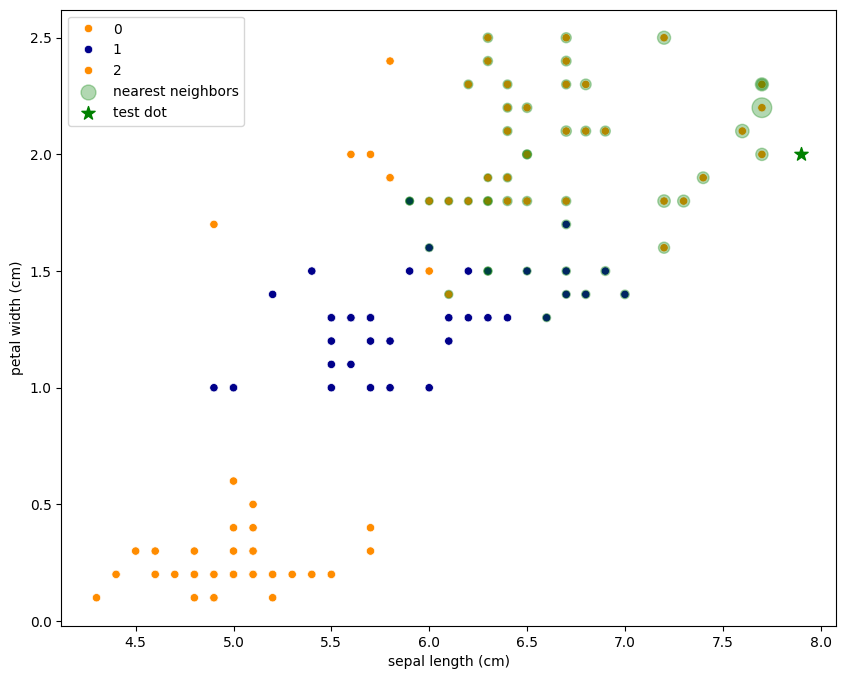

In [ ]:
# Создаем цветовую палитру для двух классов
cmap_bold = ["darkorange", "darkblue"]

# Создаем новую фигуру размером 10x8
plt.figure(figsize=(10, 8))

# Визуализируем все точки обучающего набора
sns.scatterplot(
    x=x_train['sepal length (cm)'], # Первый признак для оси X
    y=x_train['petal width (cm)'], # Второй признак для оси Y
    hue=y_train,      # Цвет точек зависит от их класса
    palette=cmap_bold # Используем созданную цветовую палитру
)

# Добавляем на график k ближайших соседей
plt.scatter(x_train.iloc[nearest_neighbors_idxs, 0], x_train.iloc[nearest_neighbors_idxs, 3],
            c='g',            # Зеленый цвет для ближайших соседей
            alpha=0.3,        # Устанавливаем прозрачность
            marker='o',       # Используем круглые маркеры
            s=neighbors_weights_normalized*200,            # Размер маркеров
            label='nearest neighbors')  # Метка для легенды

# Добавляем тестовую точку на график
plt.scatter(test_objects['sepal length (cm)'], test_objects['petal width (cm)'],
            c='g',            # Зеленый цвет для тестовой точки
            marker='*',       # Используем звездочку для обозначения тестовой точки
            s=100,            # Размер маркера
            label='test dot') # Метка для легенды

# Добавляем легенду на график
plt.legend()

### 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [77]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
data = fetch_olivetti_faces(shuffle=True, random_state=9)

x = pd.DataFrame(data['data'])
y = data['target']

x.head()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


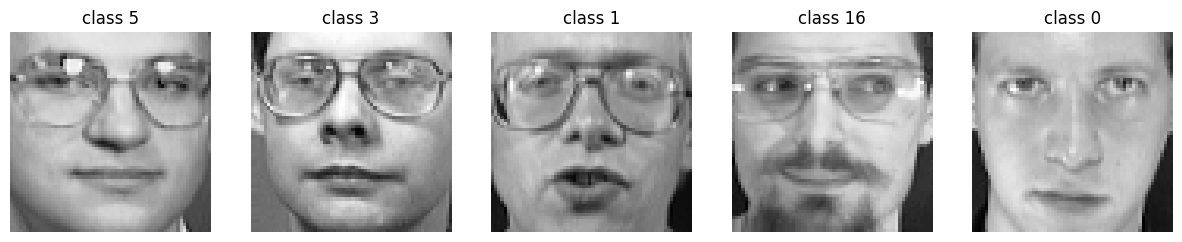

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(x.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [ ]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=20)
x_train.shape, x_test.shape

((380, 4096), (20, 4096))

#### 3.1.2. Обучите модель KNN на 50 соседях

In [ ]:
n_neighbors = 50
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### 3.1.3. Проверьте качество работы модели


In [ ]:
y_pred = model.predict(x_test)
display(y_pred, y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse: {mse} \n r2: {r2}')

array([ 4, 38, 20, 12,  2, 38, 26, 17,  4, 38, 29, 24, 20, 38, 14,  7, 11,
        1, 20, 14])

array([34, 33, 20, 24, 37, 21, 26, 17,  4, 33, 34, 27, 30, 33,  1,  7, 11,
        1, 30, 30])

mse: 164.6 
 r2: -0.22536338426606628


### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [ ]:
weighted_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights = 'distance')
weighted_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [ ]:
y_pred_weighted = weighted_model.predict(x_test)
display(y_pred_weighted, y_test)
mse = mean_squared_error(y_test, y_pred_weighted)
r2 = r2_score(y_test, y_pred_weighted)
print(f'mse: {mse} \n r2: {r2}')

array([ 4, 33, 20, 12,  4, 21, 26, 17,  4, 33, 29, 27, 20, 38, 14,  7, 11,
        1, 20, 14])

array([34, 33, 20, 24, 37, 21, 26, 17,  4, 33, 34, 27, 30, 33,  1,  7, 11,
        1, 30, 30])

mse: 140.4 
 r2: -0.045206677709329846


### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [ ]:
def calculate_q_weights(distances, q=0.3):
    weights = q ** distances
    return weights

#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [ ]:
q_weighted_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights = calculate_q_weights)
q_weighted_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50,
                     weights=<function calculate_q_weights at 0x78cc36477e20>)

#### 3.3.3. Проверьте качество работы модели


In [ ]:
y_pred_q_weighted = q_weighted_model.predict(x_test)
display(y_pred_q_weighted, y_test)
mse = mean_squared_error(y_test, y_pred_q_weighted)
r2 = r2_score(y_test, y_pred_q_weighted)
print(f'mse: {mse} \n r2: {r2}')

array([34, 33, 20, 24, 37, 21, 26, 17,  4, 33, 34, 27, 30, 33,  1,  7, 11,
        1, 30, 30])

array([34, 33, 20, 24, 37, 21, 26, 17,  4, 33, 34, 27, 30, 33,  1,  7, 11,
        1, 30, 30])

mse: 0.0 
 r2: 1.0


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [33]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import fetch_california_housing

In [34]:
data = fetch_california_housing()
x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [35]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [36]:
x = x['MedInc'].head(1000)
x.describe()

,MedInc
count,1000.000000
mean,3.842993
std,1.811349
min,0.499900
25%,2.562500
50%,3.514050
75%,4.899225
max,13.499000


In [37]:
y = y[:1000]

### Отрисуйте данные на графике

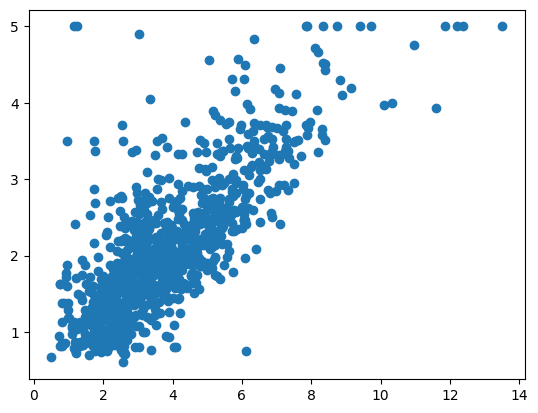

In [39]:
plt.scatter(x,y)
plt.show()

### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=100)
x_train.shape, x_test.shape

((900,), (100,))

#### 4.2. Обучите модель KNN на 100 соседях


In [44]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [45]:
n_neighbors = 100
model = KNeighborsRegressor(n_neighbors=n_neighbors)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 4.3. Проверьте качество работы модели


In [46]:
y_pred = model.predict(x_test)
display(y_pred, y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse: {mse} \n r2: {r2}')

array([1.60948  , 1.62982  , 1.51972  , 1.84581  , 1.57969  , 2.42009  ,
       1.53538  , 1.92166  , 1.3280002, 1.25956  , 1.91665  , 3.20563  ,
       3.13336  , 1.2457   , 3.3790903, 3.2704702, 1.78935  , 1.9385   ,
       1.88163  , 1.95644  , 1.92053  , 1.55944  , 2.24429  , 1.3298502,
       1.87179  , 2.61675  , 1.92053  , 1.95838  , 1.95493  , 1.94415  ,
       2.00503  , 1.51859  , 1.91877  , 3.5265207, 3.4096004, 2.62007  ,
       1.3280002, 1.54409  , 3.2704702, 1.30271  , 2.07189  , 2.00438  ,
       1.2604   , 1.95146  , 1.25691  , 3.2939602, 1.56407  , 1.3334802,
       2.05763  , 2.39519  , 1.37631  , 1.64887  , 1.96937  , 1.3032902,
       1.90454  , 1.2457   , 1.9681   , 2.09953  , 1.8433   , 1.86166  ,
       1.35281  , 1.45829  , 1.27324  , 2.02695  , 1.97215  , 1.91837  ,
       1.67308  , 2.05162  , 1.95552  , 1.28131  , 1.98404  , 1.94702  ,
       1.25691  , 3.07342  , 1.5409   , 1.3280002, 1.33866  , 2.49235  ,
       1.42367  , 1.85301  , 1.37631  , 1.93337  , 

array([1.269  , 1.573  , 2.778  , 1.429  , 1.426  , 2.173  , 1.291  ,
       2.042  , 0.818  , 1.125  , 1.826  , 3.235  , 2.969  , 0.821  ,
       3.324  , 3.333  , 3.357  , 2.992  , 2.232  , 3.096  , 3.011  ,
       1.5    , 2.316  , 1.423  , 1.921  , 3.476  , 2.757  , 1.679  ,
       1.958  , 1.22   , 3.324  , 1.909  , 1.654  , 5.00001, 3.744  ,
       2.53   , 1.125  , 1.702  , 3.418  , 1.875  , 2.234  , 1.791  ,
       1.625  , 2.734  , 1.792  , 4.125  , 2.     , 1.5    , 3.325  ,
       1.924  , 1.75   , 1.097  , 1.983  , 0.972  , 1.996  , 2.875  ,
       1.894  , 2.057  , 2.574  , 1.571  , 0.962  , 1.394  , 3.5    ,
       1.923  , 1.692  , 2.095  , 2.102  , 1.904  , 2.088  , 1.555  ,
       1.703  , 1.358  , 1.37   , 3.397  , 3.714  , 0.784  , 1.122  ,
       2.614  , 0.977  , 2.109  , 0.987  , 1.799  , 3.5    , 1.612  ,
       2.06   , 1.25   , 2.113  , 2.544  , 3.539  , 2.102  , 2.027  ,
       0.955  , 5.00001, 2.854  , 2.709  , 1.946  , 2.44   , 2.639  ,
       0.948  , 3.90

mse: 0.421874299909395 
 r2: 0.4900312951783361


#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [47]:
random_index = np.random.randint(0,500,size=1)
test_object = x_test.iloc[random_index]
distances = pd.DataFrame(pairwise_distances(x_train, test_object, metric='euclidean'))
distances.describe()

,0
count,900.000000
mean,1.568867
std,1.477634
min,0.002200
25%,0.507325
50%,1.150150
75%,2.240025
max,10.799300


#### 4.5. Выберите топ  k  соседей


In [48]:
nearest_neighbors = distances[0].sort_values().head(n_neighbors)
nearest_neighbors

,0
315,0.0022
834,0.0057
329,0.0083
671,0.0118
855,0.0162
...,...
771,0.1983
308,0.1997
576,0.2003
865,0.2021


#### 4.6. Выведите финальное предсказание для этого объекта

In [49]:
y_pred = pd.DataFrame(y_train).iloc[nearest_neighbors.index].mean()
y_pred

,0
0,1.60948


#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [52]:
y_real = y_test[random_index]
y_real[0]

1.269

In [54]:
y_pred_sklearn = model.predict(test_object)
y_pred_sklearn[0]

1.6094799999999998

#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

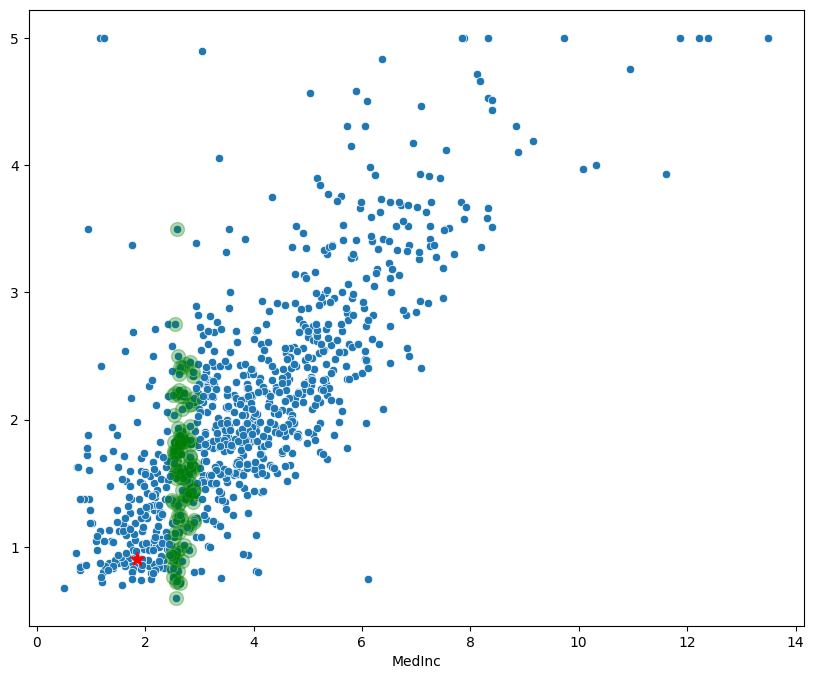

In [64]:
# Создаем цветовую палитру для двух классов
cmap_bold = ["darkorange", "darkblue"]

# Создаем новую фигуру размером 10x8
plt.figure(figsize=(10, 8))

# Визуализируем все точки обучающего набора
sns.scatterplot(
    x=x_train['MedInc'], # Первый признак для оси X
    y=y_train, # Второй признак для оси Y
)

# Добавляем на график k ближайших соседей
plt.scatter(x_train.iloc[nearest_neighbors.index], pd.DataFrame(y_train).iloc[nearest_neighbors.index],
            c='g',            # Зеленый цвет для ближайших соседей
            alpha=0.3,        # Устанавливаем прозрачность
            marker='o',       # Используем круглые маркеры
            s=100,            # Размер маркеров
            label='nearest neighbors')  # Метка для легенды

# Добавляем тестовую точку на график
plt.scatter(x_train.iloc[random_index], pd.DataFrame(y_train).iloc[random_index],
            c='r',            # Зеленый цвет для тестовой точки
            marker='*',       # Используем звездочку для обозначения тестовой точки
            s=100,            # Размер маркера
            label='test dot') # Метка для легенды


### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [65]:
weighted_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights = 'distance')
weighted_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 5.2. Проверьте качество работы модели


In [66]:
y_pred_weighted = weighted_model.predict(x_test)
display(y_pred_weighted, y_test)
mse = mean_squared_error(y_test, y_pred_weighted)
r2 = r2_score(y_test, y_pred_weighted)
print(f'mse: {mse} \n r2: {r2}')

array([1.67809132, 1.78117646, 1.28107446, 1.80971945, 1.66146537,
       2.52837977, 1.70096158, 2.351     , 1.37724829, 1.43609791,
       1.7446    , 3.21614224, 3.16071092, 1.35468931, 3.46929628,
       3.29795336, 1.75706722, 1.89388293, 1.96805829, 2.07976673,
       1.88187751, 1.61794503, 2.22788413, 1.26619133, 1.89447866,
       2.41426563, 1.89202291, 2.026     , 1.82863832, 1.91126652,
       2.45662918, 1.37898568, 1.96297199, 3.78734426, 3.78361746,
       2.64783885, 1.00078414, 1.75902584, 3.32883902, 1.44532663,
       2.17211276, 1.95900118, 1.30246297, 1.89364004, 1.21841778,
       3.32136271, 1.55365656, 1.3941384 , 2.21997773, 2.47345797,
       1.29092023, 1.62964541, 1.368     , 1.26924952, 1.076     ,
       1.139     , 2.05765753, 2.1125561 , 1.55885726, 1.80899689,
       1.39646007, 1.527     , 1.3241579 , 2.02019857, 1.96247143,
       1.82574408, 1.60566225, 2.18493571, 1.89961355, 1.61131341,
       2.15010075, 2.188     , 1.23803505, 3.39088946, 1.35201

array([1.269  , 1.573  , 2.778  , 1.429  , 1.426  , 2.173  , 1.291  ,
       2.042  , 0.818  , 1.125  , 1.826  , 3.235  , 2.969  , 0.821  ,
       3.324  , 3.333  , 3.357  , 2.992  , 2.232  , 3.096  , 3.011  ,
       1.5    , 2.316  , 1.423  , 1.921  , 3.476  , 2.757  , 1.679  ,
       1.958  , 1.22   , 3.324  , 1.909  , 1.654  , 5.00001, 3.744  ,
       2.53   , 1.125  , 1.702  , 3.418  , 1.875  , 2.234  , 1.791  ,
       1.625  , 2.734  , 1.792  , 4.125  , 2.     , 1.5    , 3.325  ,
       1.924  , 1.75   , 1.097  , 1.983  , 0.972  , 1.996  , 2.875  ,
       1.894  , 2.057  , 2.574  , 1.571  , 0.962  , 1.394  , 3.5    ,
       1.923  , 1.692  , 2.095  , 2.102  , 1.904  , 2.088  , 1.555  ,
       1.703  , 1.358  , 1.37   , 3.397  , 3.714  , 0.784  , 1.122  ,
       2.614  , 0.977  , 2.109  , 0.987  , 1.799  , 3.5    , 1.612  ,
       2.06   , 1.25   , 2.113  , 2.544  , 3.539  , 2.102  , 2.027  ,
       0.955  , 5.00001, 2.854  , 2.709  , 1.946  , 2.44   , 2.639  ,
       0.948  , 3.90

mse: 0.4451773229558893 
 r2: 0.4618622114394064


#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [67]:
distances.describe()

,0
count,900.000000
mean,1.568867
std,1.477634
min,0.002200
25%,0.507325
50%,1.150150
75%,2.240025
max,10.799300


#### 5.4. Выберите топ  k  соседей


In [69]:
nearest_neighbors

,0
315,0.0022
834,0.0057
329,0.0083
671,0.0118
855,0.0162
...,...
771,0.1983
308,0.1997
576,0.2003
865,0.2021


#### 5.5. Рассчитайте вес для каждого соседа

In [70]:
weights = 1/distances.iloc[nearest_neighbors.index]
weights

,0
315,454.545455
834,175.438596
329,120.481928
671,84.745763
855,61.728395
...,...
771,5.042864
308,5.007511
576,4.992511
865,4.948046


#### 5.6. Выведите финальное предсказание для этого объекта

In [71]:
y_pred_final = pd.DataFrame(y_train).iloc[nearest_neighbors.index].multiply(weights).sum()/weights.sum()
y_pred_final

,0
0,1.678091


#### 5.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [72]:
y_real

array([1.269])

In [73]:
y_pred_sklearn

array([1.60948])

#### 5.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

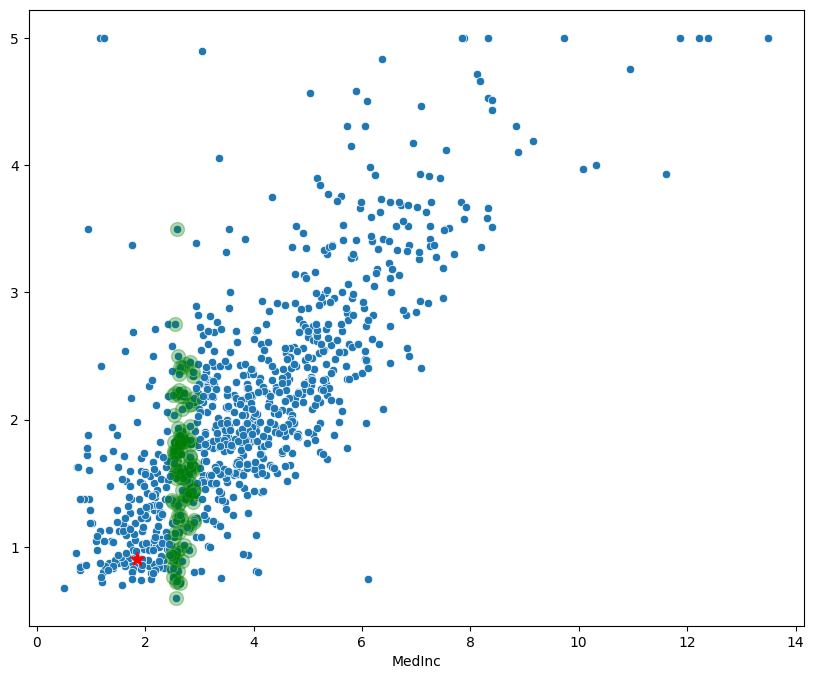

In [74]:
# Создаем цветовую палитру для двух классов
cmap_bold = ["darkorange", "darkblue"]

# Создаем новую фигуру размером 10x8
plt.figure(figsize=(10, 8))

# Визуализируем все точки обучающего набора
sns.scatterplot(
    x=x_train['MedInc'], # Первый признак для оси X
    y=y_train, # Второй признак для оси Y
)

# Добавляем на график k ближайших соседей
plt.scatter(x_train.iloc[nearest_neighbors.index], pd.DataFrame(y_train).iloc[nearest_neighbors.index],
            c='g',            # Зеленый цвет для ближайших соседей
            alpha=0.3,        # Устанавливаем прозрачность
            marker='o',       # Используем круглые маркеры
            s=100,            # Размер маркеров
            label='nearest neighbors')  # Метка для легенды

# Добавляем тестовую точку на график
plt.scatter(x_train.iloc[random_index], pd.DataFrame(y_train).iloc[random_index],
            c='r',            # Зеленый цвет для тестовой точки
            marker='*',       # Используем звездочку для обозначения тестовой точки
            s=100,            # Размер маркера
            label='test dot') # Метка для легенды


## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [101]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import GridSearchCV

In [113]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)
train.shape, test.shape

((320, 4096), (80, 4096))

Поделим данные на x и y, где x - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [84]:
n_pixels = data.shape[1]

# Upper half of the faces
x_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


x_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

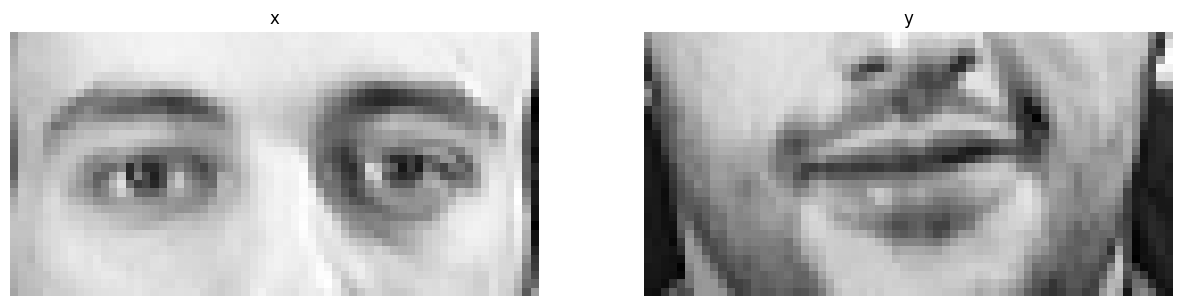

In [85]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(x_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('x')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [86]:
n_neighbors = 100
model = KNeighborsRegressor(n_neighbors=n_neighbors)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [88]:
y_pred = model.predict(x_test)
display(y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse: {mse} \n r2: {r2}')

array([[0.60450435, 0.64760345, 0.6827271 , ..., 0.2609091 , 0.2559091 ,
        0.25272727],
       [0.49983472, 0.5175619 , 0.5516942 , ..., 0.317686  , 0.2982231 ,
        0.29342982],
       [0.5943803 , 0.63520664, 0.672314  , ..., 0.2786777 , 0.27028924,
        0.26619834],
       ...,
       [0.51289254, 0.5232231 , 0.5395041 , ..., 0.35685948, 0.34962806,
        0.33925614],
       [0.49772727, 0.51483464, 0.5403306 , ..., 0.33293393, 0.31690082,
        0.3172727 ],
       [0.43400833, 0.4430579 , 0.46677685, ..., 0.39107448, 0.38297522,
        0.3715702 ]], dtype=float32)

mse: 0.01594657078385353 
 r2: 0.21050623059272766


In [87]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None}

In [89]:
pred_test = {'knn': y_pred}

#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [90]:
weighted_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights = 'distance')
weighted_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [95]:
y_pred_weighted = weighted_model.predict(x_test)
display(y_pred_weighted)
pred_test['weighted_knn'] = y_pred_weighted
mse = mean_squared_error(y_test, y_pred_weighted)
r2 = r2_score(y_test, y_pred_weighted)
print(f'mse: {mse} \n r2: {r2}')

array([[0.61631249, 0.66162605, 0.69497104, ..., 0.248679  , 0.24555331,
        0.24163763],
       [0.50001949, 0.515979  , 0.55145199, ..., 0.31594566, 0.29516324,
        0.29114545],
       [0.59440222, 0.63736474, 0.6760539 , ..., 0.27538781, 0.26673245,
        0.26297101],
       ...,
       [0.51035698, 0.52232821, 0.54064805, ..., 0.35332604, 0.34699927,
        0.33691835],
       [0.4967558 , 0.5138125 , 0.53867522, ..., 0.33567716, 0.31941947,
        0.32059867],
       [0.42418498, 0.4326403 , 0.45572786, ..., 0.39296859, 0.38581709,
        0.37214083]])

mse: 0.015302634805686121 
 r2: 0.24241627640538166


#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [96]:
def calculate_q_weights(distances, q=0.3):
    weights = q ** distances
    return weights

#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [97]:
custom_weighted_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights = calculate_q_weights)
custom_weighted_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=100,
                    weights=<function calculate_q_weights at 0x7d6af42e0ca0>)

#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [98]:
y_pred_custom_weighted = custom_weighted_model.predict(x_test)
display(y_pred_custom_weighted)
pred_test['weighted_knn_custom'] = y_pred_custom_weighted
mse = mean_squared_error(y_test, y_pred_custom_weighted)
r2 = r2_score(y_test, y_pred_custom_weighted)
print(f'mse: {mse} \n r2: {r2}')

array([[0.72342802, 0.76835073, 0.78441462, ..., 0.13314718, 0.14915412,
        0.14399531],
       [0.5047824 , 0.50793985, 0.55998542, ..., 0.28482418, 0.25903876,
        0.25890111],
       [0.60844732, 0.67882452, 0.73100696, ..., 0.252885  , 0.24474498,
        0.2567811 ],
       ...,
       [0.47538054, 0.5221721 , 0.6154429 , ..., 0.23957576, 0.25273556,
        0.24551346],
       [0.49703861, 0.51845448, 0.53857008, ..., 0.35419828, 0.33784981,
        0.34299809],
       [0.34115722, 0.32226838, 0.33868772, ..., 0.41351644, 0.4057365 ,
        0.33898666]])

mse: 0.009957788681379597 
 r2: 0.5045400429292933


А сейчас отрисуем все предсказания.

In [99]:
ESTIMATORS = {'knn': y_pred,
              'weighted_knn': y_pred_weighted,
              'weighted_knn_custom': y_pred_custom_weighted}

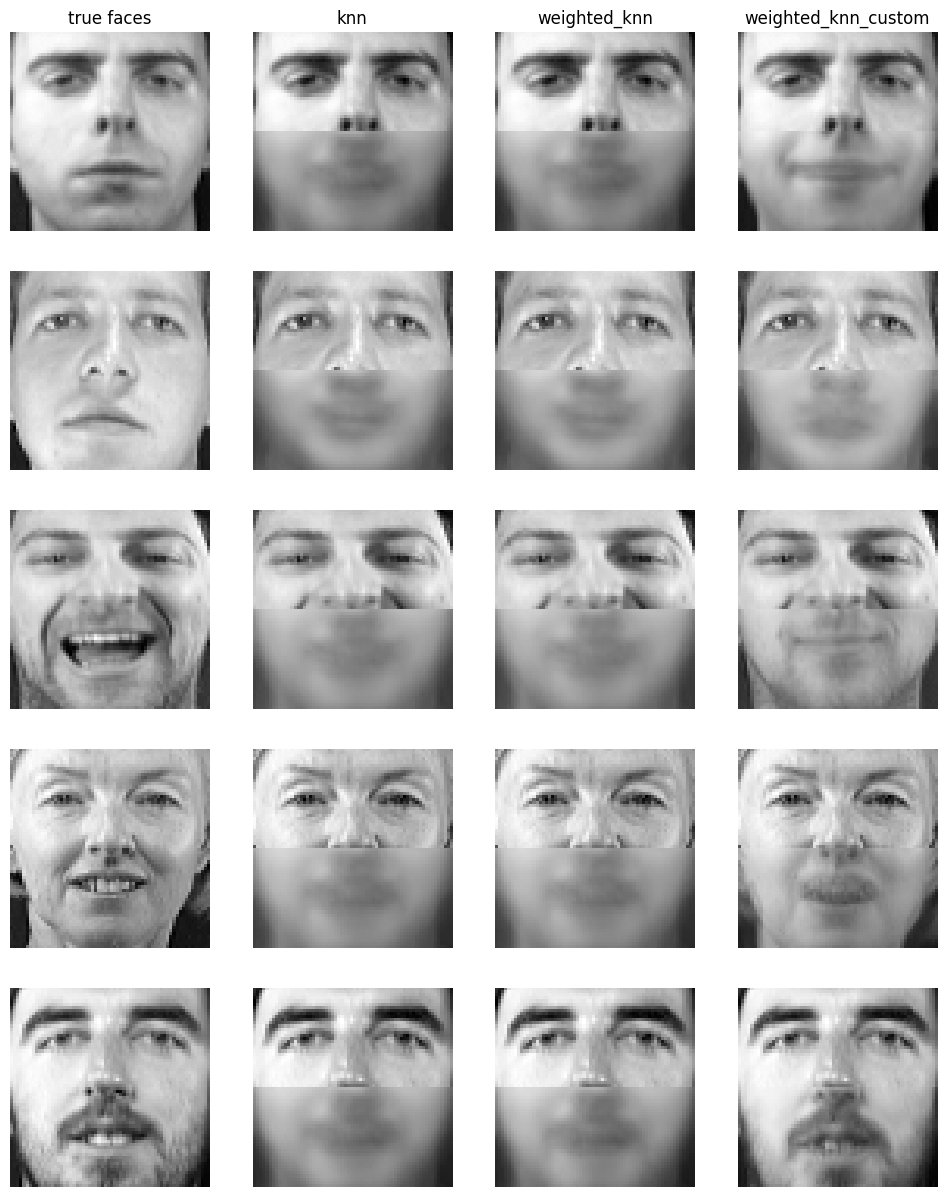

In [100]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((x_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((x_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

#### 7*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, предыдущей работе, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)


[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)

In [115]:
param_grid = {'n_neighbors': np.arange(10, 100, 10)}

model = KNeighborsRegressor()
gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)
gs.fit(x_train, y_train)
gs_best_params = gs.best_params_
gs_best_score =gs.best_score_
print(f"Лучшие параметры (GridSearchCV): {gs_best_params}")
print(f"Лучший r2_score (GridSearchCV): {gs_best_score}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Лучшие параметры (GridSearchCV): {'n_neighbors': 10}
Лучший r2_score (GridSearchCV): 0.3537828226884206
